# What is customer segmentation?
Customer segmentation is the practice of dividing a customer base into groups of individuals that have similar characteristics relevant to marketing, such as age, gender, interests and spending habits.

The goal of customer segmentation is to reach out to customers more effectively, thereby leading to more sales or customer conversions. Companies also hope to gain a deeper understanding of their customers' preferences and needs by discovering what each segment finds most valuable and more accurately tailoring marketing materials toward that segment.

# Importing Data and Libraries  

In [2]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

customers = pd.read_csv("F:\\INTERNSAVY INTERNSHIP\\Mall_Customers.csv")

customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.shape

(200, 5)

In [5]:
df.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
185,186,Male,30,99,97
147,148,Female,32,77,74
32,33,Male,53,33,4
23,24,Male,31,25,73
181,182,Female,32,97,86
30,31,Male,60,30,4
182,183,Male,46,98,15
172,173,Male,36,87,10
33,34,Male,18,33,92
18,19,Male,52,23,29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values in the data

In [8]:
df.duplicated().sum()

0

There are no duplicate values in the data

In [9]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From calling describe, you can see that there are no values to clean. Age looks pretty normally distributed, annual income doesn’t have outliers that are too excessive. Spending score is in fact between 1 and 100. Everything looks good.

# Exploring the Data

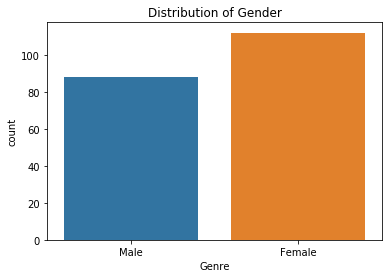

In [11]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Genre', data=customers);
plt.title('Distribution of Gender');

There are slightly more women than men in this data set. They will perhaps be a significant element in your customer segmentation efforts later.

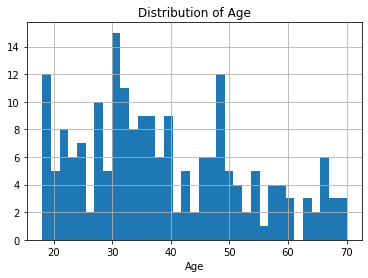

In [12]:
# Create a histogram of ages
customers.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

The ages are mostly between 30 and 40. Recalling the describe() call results this makes sense. The average age was 38. There are less older customers, so this distribution is right-skewed because of its longer right tail. This could be because of the appeal of malls and the type of demographic that tends to shop there.

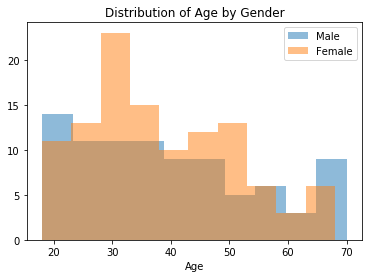

In [14]:
plt.hist('Age', data=customers[customers['Genre'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=customers[customers['Genre'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

The men in this data set tended to be younger than the women. You can see the spike around the age of 30–35 for the women is where the majority of them fall. There are also more middle-aged women in this data set than men. There is a significant amount of senior men in the 65–70 year old bucket.

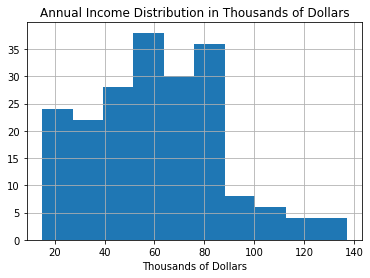

In [15]:
customers.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

Much of the incomes lie between the 60 and 85,000 dollar buckets. Does gender impact this?

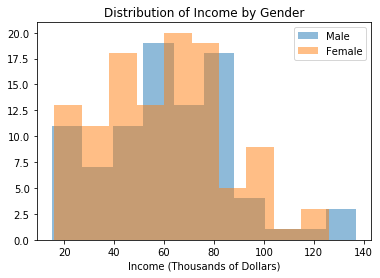

In [16]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=customers[customers['Genre'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=customers[customers['Genre'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

The women in this data set make less money than the men. What does their spending score look like and how does it compare though?

In [17]:
# Create data sets by gender to save time in the future since gender seems to significantly impact other variables
male_customers = customers[customers['Genre'] == 'Male']
female_customers = customers[customers['Genre'] == 'Female']

# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


Men had an average spending score of 48.5 and women had an average score of 51.5. Women earned less but spent more at this mall and in this data set.

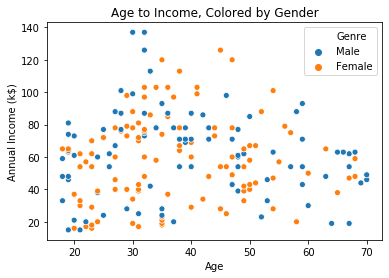

In [20]:
sns.scatterplot('Age', 'Annual Income (k$)', hue='Genre', data=customers);
plt.title('Age to Income, Colored by Gender');

There is no clear correlation. Let's check by plotting heatmap.

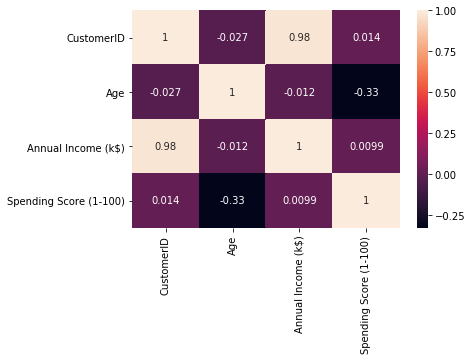

In [21]:
sns.heatmap(customers.corr(), annot=True)

You can see from the above plot that the only variables that are even somewhat correlated is spending score and age. It’s a negative correlation so the older a customer is in this data set, the lower their spending score. But because it’s 0.33, it’s not a strong correlation at all.

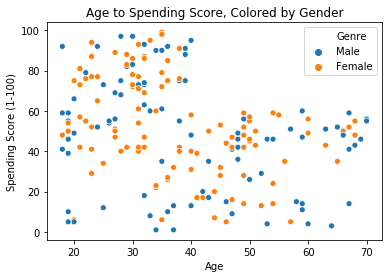

In [22]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Genre', data=customers);
plt.title('Age to Spending Score, Colored by Gender');

You can now see that slight negative correlation.

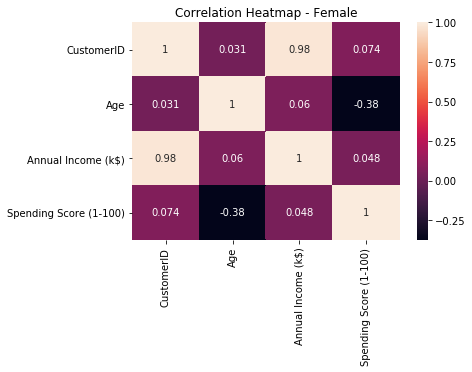

In [23]:
sns.heatmap(female_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Female');

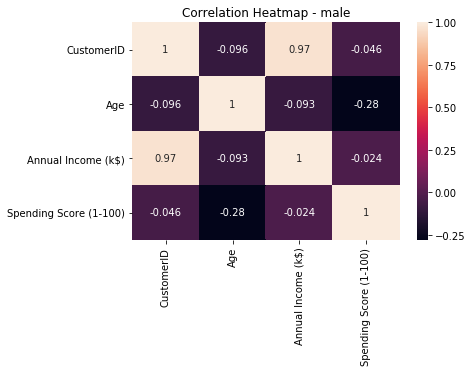

In [25]:
sns.heatmap(male_customers.corr(), annot=True);
plt.title('Correlation Heatmap - male');

Age more strongly affects spending score for women in this case. Nothing else is really strongly correlated enough to say much of anything.

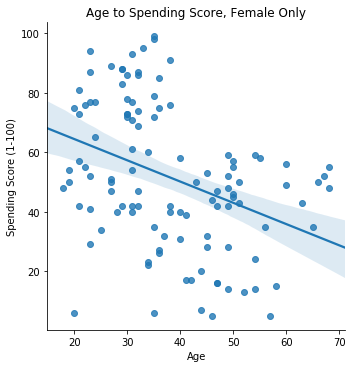

In [26]:
sns.lmplot('Age', 'Spending Score (1-100)', data=female_customers);
plt.title('Age to Spending Score, Female Only');

Scatter of age to spending score for women, with a regression line and bootstrap interval about the line

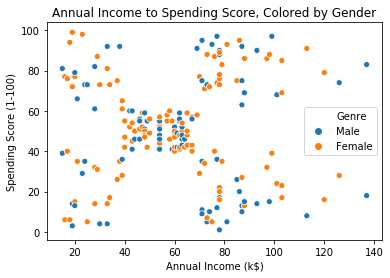

In [27]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Genre', data=customers);
plt.title('Annual Income to Spending Score, Colored by Gender');

# Hierarchical Clustering

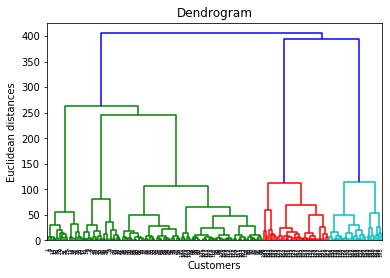

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("F:\\INTERNSAVY INTERNSHIP\\Mall_Customers.csv")
x = dataset.iloc[:, [3,4]].values
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


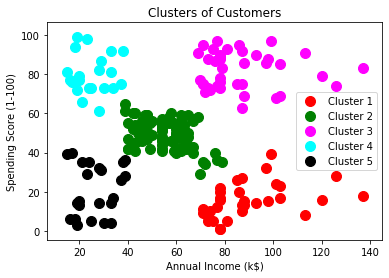

In [30]:
from sklearn.cluster import  AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s=100, c='green', label='Cluster 2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s=100, c='magenta', label='Cluster 3')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], s=100, c='black', label='Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

There is some patterning here. Zero correlation though. But you can think of these as customer segments:
   
   1. Low income, low spending score
   2. Low income, high spending score
   3. Mid income, medium spending score
   4. High income, low spending score
   5. High income, high spending score

# KPIs

1) The change in frequency and volume of purchases by women after the introduction of more marketing campaigns targeting them.

2) The change in spending score after introducing marketing campaigns targeting younger women. 

3) The change in spending score after introducing marketing campaigns targeting older women.